In [2]:
# Load libraries
import json
import pandas
from IPython.display import display, HTML

# load data
raw = pandas.read_csv("raw.csv", encoding="big5", index_col=[0,1])
raw = raw.reset_index("區域")
display(raw.iloc[:,6]>0.5)
X = raw.iloc[:,10:]
y = raw.iloc[:,6]>0.5

行政區
基隆市    False
宜蘭縣     True
新北市    False
新竹市    False
新竹縣    False
桃園市    False
臺北市     True
南投縣     True
彰化縣     True
臺中市     True
苗栗縣     True
雲林縣     True
嘉義市     True
嘉義縣     True
屏東縣     True
臺南市     True
高雄市     True
臺東縣     True
花蓮縣     True
澎湖縣     True
連江縣     True
金門縣     True
Name: 7-11 (%), dtype: bool

In [3]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create decision tree classifer object
clf = DecisionTreeClassifier(random_state=0)

# Train model
model = clf.fit(X, y)

In [14]:
display(X.columns)
display(y.name)

Index(['綜合所得總額', '綜合所得平均數', '綜合所得變異係數', '薪資所得', '股利所得', '失業率(107年)',
       '土地面積(平方公里)', '人口數(人)', '人口密度(人/平方公里)', '戶數(戶)', '戶量(人/戶)',
       '幼年人口(0-14歲)', '工作年齡人口(15-64歲)', '老年人口(65歲以上)', '人口性比例(女=100)',
       '公司登記新設家數', '刑案發生率', '竊盜案發生率', '暴力犯罪發生率', '營利事業營業家數', '營利事業銷售額',
       '公司登記現有家數', '公司登記現有資本額', '商業登記現有家數', '商業登記現有資本額'],
      dtype='object')

'7-11 (%)'

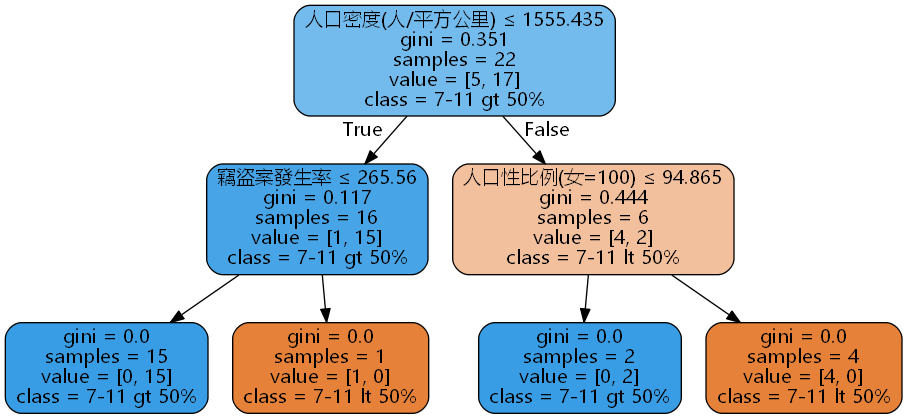

In [26]:
# Create DOT data
from sklearn.externals.six import StringIO 
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                                feature_names=X.columns,  
                                class_names=["7-11 lt 50%","7-11 gt 50%"],
                                filled=True, rounded=True,
                                special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace('helvetica','"Microsoft YaHei"'))  

# Show graph
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
Image(graph.create_png())

In [27]:
# Create PNG
graph.write_png("7-11_50.png")

True